<a href="https://colab.research.google.com/github/vbang247/python/blob/main/MSIS549_HW2_CNN_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSIS 579 HW2 CNN to recognize Rock/Paper/Scissors

In this homework, we will train a convolution neural network to recognize gesture Rock/Paper/Scissors. 

## Load Rock/Paper/Scissors Dataset
First we download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-05-31 02:27:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   183MB/s    in 1.0s    

2022-05-31 02:27:39 (183 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-05-31 02:27:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/t

In [2]:
%tensorflow_version 2.8.0
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.autograph.set_verbosity(0)

import os
import zipfile

import keras
keras.__version__

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.8.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


After running the folloiwng code, you will have exactly 840 images for each gesture. 

In [3]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

rock_dir = os.path.join('/tmp/rps/rock')

paper_dir = os.path.join('/tmp/rps/paper')

scissors_dir = os.path.join('/tmp/rps/scissors')


print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-060.png', 'rock05ck01-001.png', 'rock06ck02-010.png', 'rock04-118.png', 'rock02-031.png', 'rock01-105.png', 'rock02-030.png', 'rock04-010.png', 'rock05ck01-038.png', 'rock01-019.png']
['paper03-040.png', 'paper01-034.png', 'paper07-119.png', 'paper02-082.png', 'paper04-028.png', 'paper06-009.png', 'paper05-036.png', 'paper01-093.png', 'paper05-104.png', 'paper06-117.png']
['scissors02-117.png', 'scissors03-045.png', 'scissors03-108.png', 'scissors04-019.png', 'scissors04-111.png', 'scissors02-107.png', 'scissors03-039.png', 'scissors01-104.png', 'scissors01-073.png', 'scissors01-044.png']


In [4]:
import os
import shutil
import numpy as np


original_dataset_dir = '/tmp/rps/'

# The directory where we will
# store our smaller dataset
base_dir = '/tmp/rps_flatten'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Creating Train / Val / folders (One time use)
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir='/tmp/rps-test-set/'


def make_category_dir(dataset_dir, category_name, fnames):
  sub_train_dir = os.path.join(dataset_dir, 'train', category_name)
  os.makedirs(sub_train_dir)
  sub_val_dir = os.path.join(dataset_dir, 'validation', category_name)
  os.makedirs(sub_val_dir)

  train_fs, val_fs = np.split(np.array(fnames),[int(len(fnames)*0.7)])

  for fname in train_fs:
    src = os.path.join(original_dataset_dir, category_name, fname)
    dst = os.path.join(sub_train_dir, fname)
    shutil.copyfile(src, dst)

  for fname in val_fs:
    src = os.path.join(original_dataset_dir, category_name, fname)
    dst = os.path.join(sub_val_dir, fname)
    shutil.copyfile(src, dst)

make_category_dir(base_dir, 'rock', rock_files)
make_category_dir(base_dir, 'paper', paper_files)
make_category_dir(base_dir, 'scissors', scissors_files)


In [5]:
print('total training rock images:', len(os.listdir(validation_dir+'/paper')))
print('total training rock images:', len(os.listdir(validation_dir+'/scissors')))
print('total training rock images:', len(os.listdir(validation_dir+'/rock')))

total training rock images: 252
total training rock images: 252
total training rock images: 252


Now, let's plot 2 images from each class.  You wil find those images are taken from different views and images vary a lot even for the same gesture. 

/tmp/rps/rock/rock04-060.png


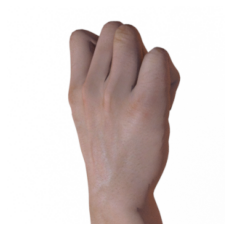

/tmp/rps/rock/rock05ck01-001.png


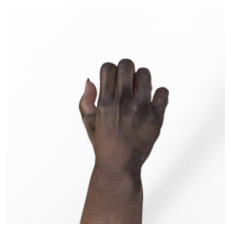

/tmp/rps/paper/paper03-040.png


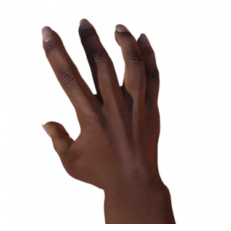

/tmp/rps/paper/paper01-034.png


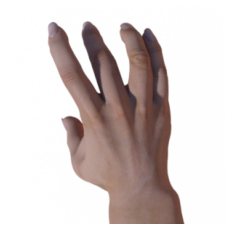

/tmp/rps/scissors/scissors02-117.png


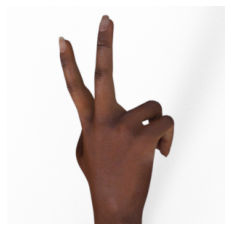

/tmp/rps/scissors/scissors03-045.png


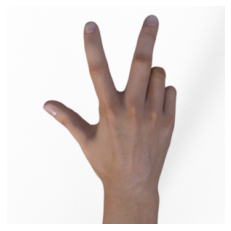

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## TASK 1: Build a fully connect Neural Network
First, let's try what we've learned from the previous lecture. We will build a FULLY connect neural networks to classify the gesture images.You are free to experiment with different structure of the network, data augmentation, dropout, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.  Watch out for overfitting.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [7]:
# TODO
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from keras import models
from keras import layers

model = tf.keras.models.Sequential()
                                  
model.add(layers.Dense(64, activation='relu', input_shape=(150,150,3)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))


In [8]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['acc'])

In [9]:

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150,150), 
        batch_size=20,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

              
history = model.fit_generator(
    train_generator,
    steps_per_epoch=60,
    epochs=18,
    validation_data=validation_generator,
    validation_steps=30,
)

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/18
60/60 [==============================] - 9s 114ms/step - loss: 3.8405 - acc: 0.6008 - val_loss: 0.4274 - val_acc: 0.9233
Epoch 2/18
60/60 [==============================] - 7s 108ms/step - loss: 0.4471 - acc: 0.8446 - val_loss: 0.4339 - val_acc: 0.8050
Epoch 3/18
60/60 [==============================] - 7s 109ms/step - loss: 0.1895 - acc: 0.9493 - val_loss: 0.1216 - val_acc: 0.9600
Epoch 4/18
60/60 [==============================] - 7s 110ms/step - loss: 0.2241 - acc: 0.9500 - val_loss: 0.0280 - val_acc: 0.9950
Epoch 5/18
60/60 [==============================] - 6s 108ms/step - loss: 0.0644 - acc: 0.9806 - val_loss: 0.0200 - val_acc: 0.9967
Epoch 6/18
60/60 [==============================] - 6s 108ms/step - loss: 0.1372 - acc: 0.9721 - val_loss: 0.0140 - val_acc: 0.9950
Epoch 7/18
60/60 [==============================] - 7s 121ms/step - loss: 0.0897 - a

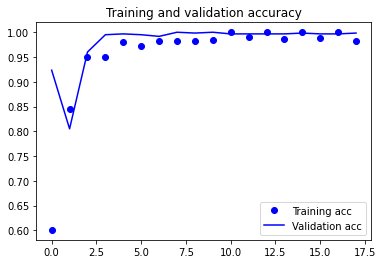

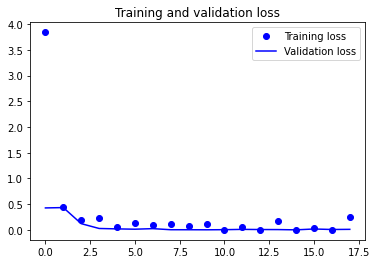

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# evaluate model accuracy on test data

# model accuracy should be very low on test set (33%)

model_score = model.evaluate_generator(test_generator)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

Model Test Loss: 6.32235050201416
Model Test Accuracy: 0.5537634491920471


## TASK 2: Build Convolution Neural Network
Now, let's try a convolution neural network (CNN) and see if we can achieve better performance. Similarly you are free to experiment with different structure of the network, techniques to avoid overfitting, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [12]:
# TODO build CNN model and add data augmentation
model = models.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

In [13]:
# TODO plot training and validation accuracy + training and validation loss
train_datagen = ImageDataGenerator(rescale=1./255)


validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1764 images belonging to 3 classes.
Found 756 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [14]:
# TODO evaluate model accuracy on test data
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=18,
      validation_data=validation_generator,
      validation_steps=30)

Epoch 1/18
60/60 [==============================] - 9s 110ms/step - loss: 0.8322 - acc: 0.6000 - val_loss: 0.1549 - val_acc: 0.9433
Epoch 2/18
60/60 [==============================] - 7s 119ms/step - loss: 0.1306 - acc: 0.9552 - val_loss: 0.1075 - val_acc: 0.9533
Epoch 3/18
60/60 [==============================] - 7s 117ms/step - loss: 0.0289 - acc: 0.9908 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 4/18
60/60 [==============================] - 6s 106ms/step - loss: 0.0356 - acc: 0.9916 - val_loss: 1.3998e-04 - val_acc: 1.0000
Epoch 5/18
60/60 [==============================] - 6s 108ms/step - loss: 0.0196 - acc: 0.9932 - val_loss: 0.0379 - val_acc: 0.9850
Epoch 6/18
60/60 [==============================] - 6s 105ms/step - loss: 5.8888e-04 - acc: 1.0000 - val_loss: 1.0950e-05 - val_acc: 1.0000
Epoch 7/18
60/60 [==============================] - 6s 105ms/step - loss: 9.9990e-06 - acc: 1.0000 - val_loss: 2.2749e-06 - val_acc: 1.0000
Epoch 8/18
60/60 [==============================] - 7s 1

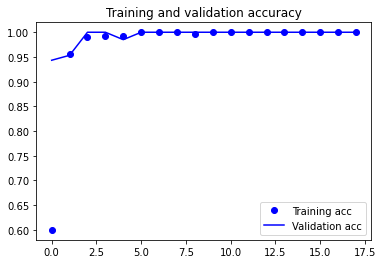

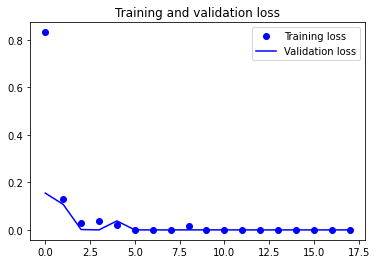

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# evaluate model accuracy on test data

# model accuracy should be very low on test set (33%)

model_score = model.evaluate_generator(test_generator)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

Model Test Loss: 4.593933582305908
Model Test Accuracy: 0.8225806355476379


## Use the best model to classify gestures
You can now run the following code and use the model you trained to classify images uploaded from your laptop. Let us know how your model performs on the new unseen images.  

Saving WhatsApp Image 2022-05-30 at 6.23.01 PM (1).jpeg to WhatsApp Image 2022-05-30 at 6.23.01 PM (1) (8).jpeg
Saving WhatsApp Image 2022-05-30 at 6.23.01 PM (2).jpeg to WhatsApp Image 2022-05-30 at 6.23.01 PM (2) (8).jpeg
Saving WhatsApp Image 2022-05-30 at 6.23.02 PM.jpeg to WhatsApp Image 2022-05-30 at 6.23.02 PM (8).jpeg
Saving WhatsApp Image 2022-05-30 at 6.31.26 PM.jpeg to WhatsApp Image 2022-05-30 at 6.31.26 PM (2).jpeg


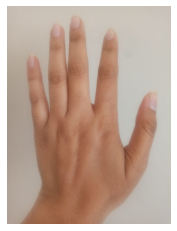

WhatsApp Image 2022-05-30 at 6.23.01 PM (1).jpeg
[[1. 0. 0.]]
[0]
paper


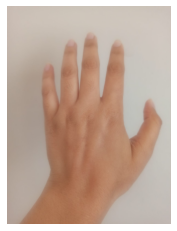

WhatsApp Image 2022-05-30 at 6.23.01 PM (2).jpeg
[[1. 0. 0.]]
[0]
paper


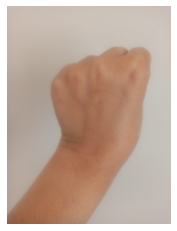

WhatsApp Image 2022-05-30 at 6.23.02 PM.jpeg
[[0. 1. 0.]]
[1]
rock


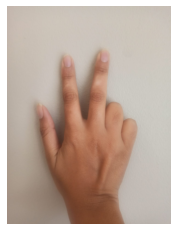

WhatsApp Image 2022-05-30 at 6.31.26 PM.jpeg
[[0. 0. 1.]]
[2]
scissor


In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  # These are images that I clicked using my phone
  path = fn
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  #keras.np_utils.probas_to_classes(y_proba)
  #y_prob = model.predict(x) 
  y_classes = classes.argmax(axis=-1)

  print(fn)
  print(classes)
  print(y_classes)

  class_names = ['paper', 'rock', 'scissor']

  print(class_names[np.argmax(classes)])
